In [68]:
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import numpy as np
images = []
ascii_range =(32,127)
for i in range(ascii_range[0],ascii_range[1]):
    print(i)
  
    fig = Figure()
    canvas = FigureCanvas(fig)
    ax = fig.gca()

    ax.text(0.0,0.0,str(chr(i)), fontsize=120)
    ax.axis('off')
    
    canvas.draw()       # draw the canvas, cache the renderer
    s, (width, height) = canvas.print_to_buffer()
    images.append(np.mean(np.fromstring(s, np.uint8).reshape((height, width, 4)),axis=2))
    
plt.show()


32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

C:\Users\arsee\Anaconda3\envs\nn_in_arts\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead



47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126


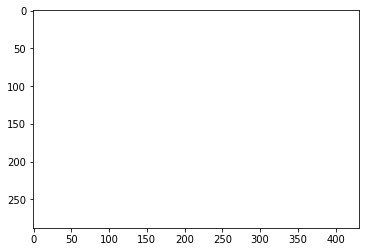

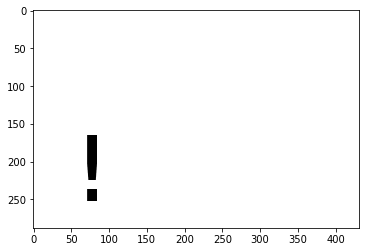

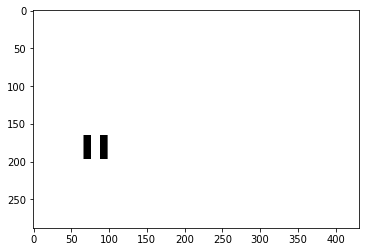

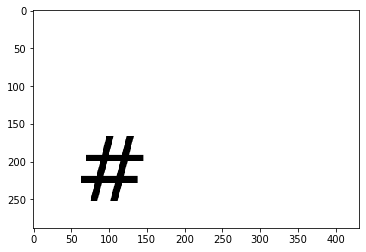

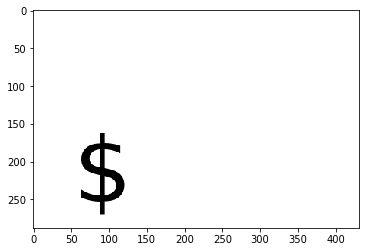

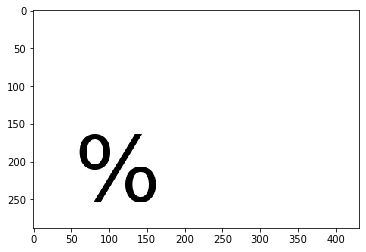

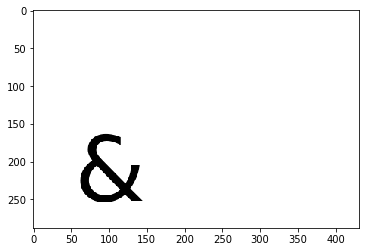

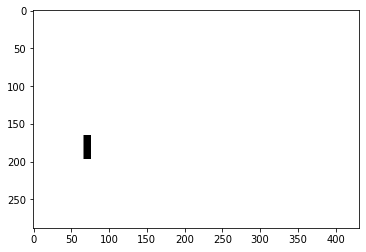

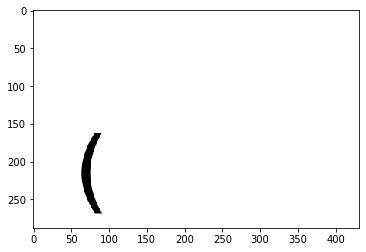

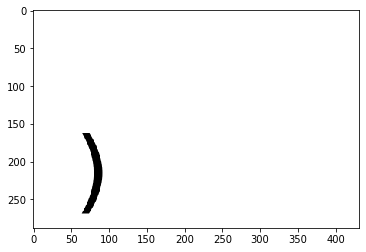

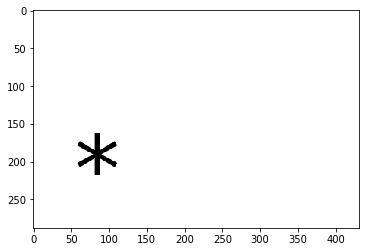

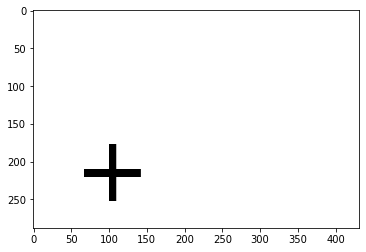

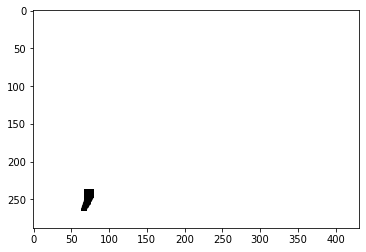

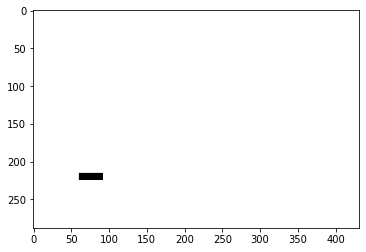

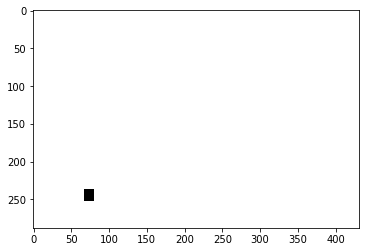

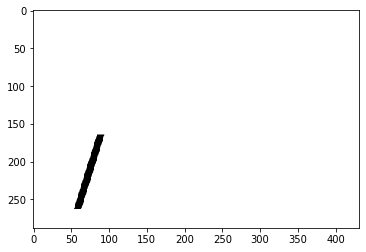

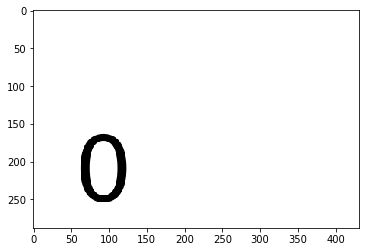

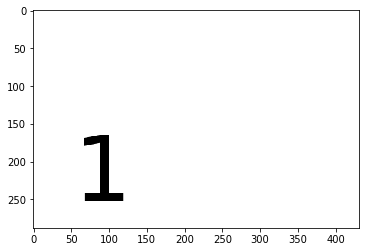

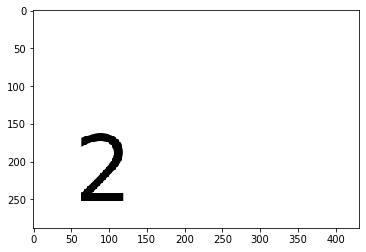

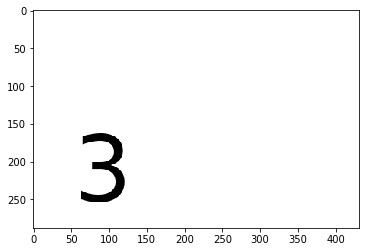

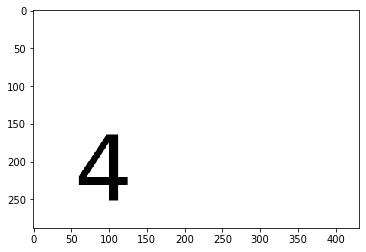

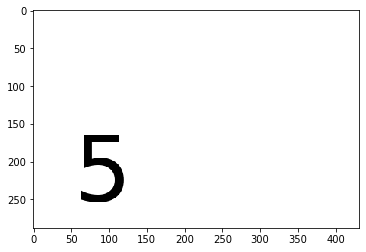

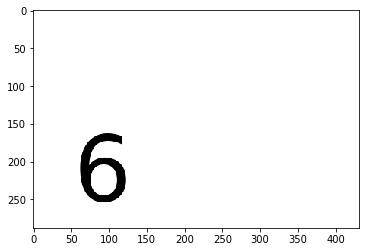

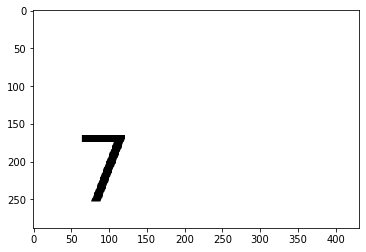

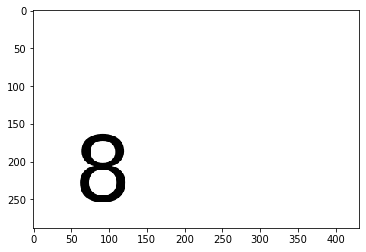

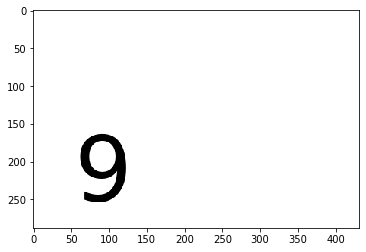

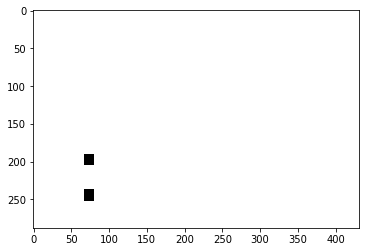

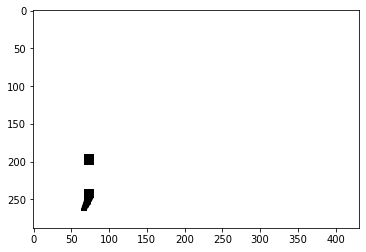

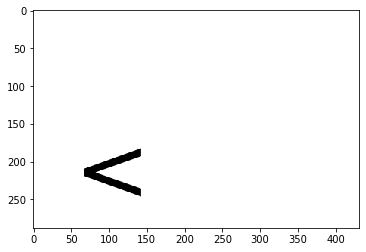

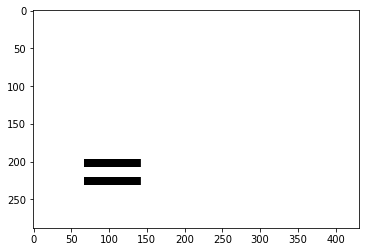

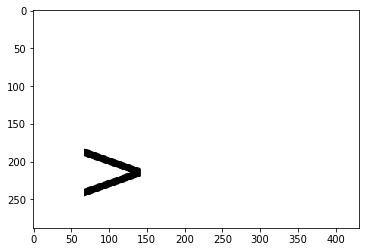

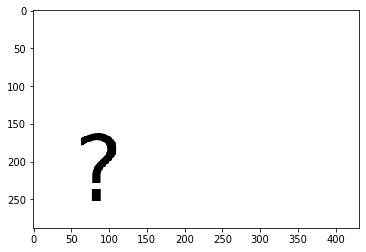

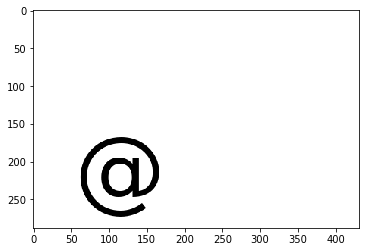

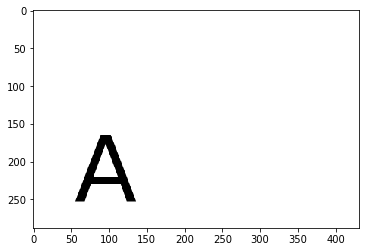

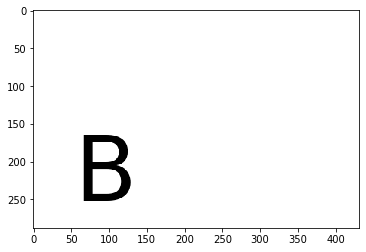

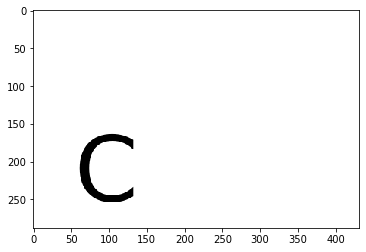

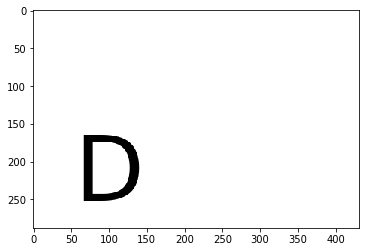

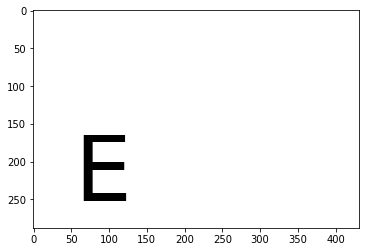

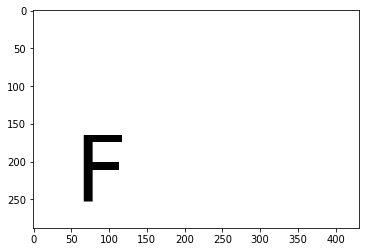

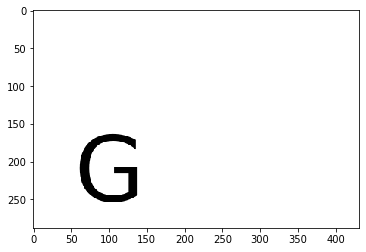

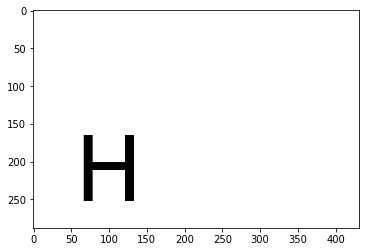

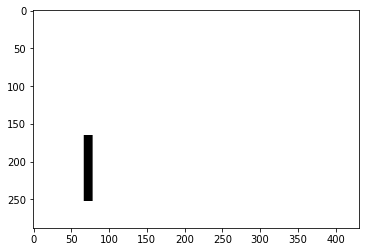

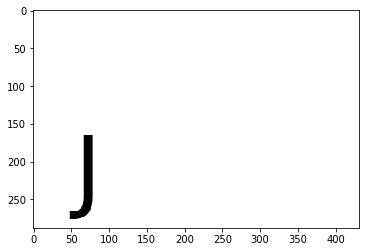

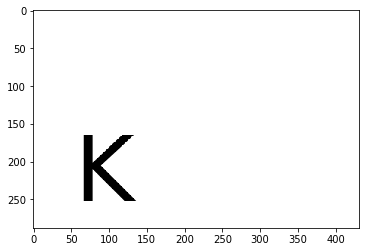

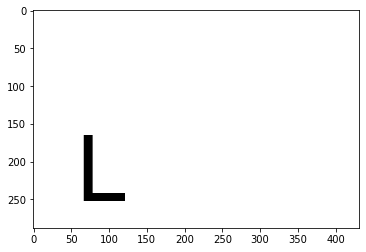

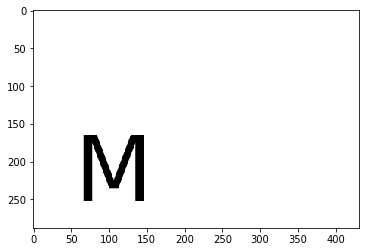

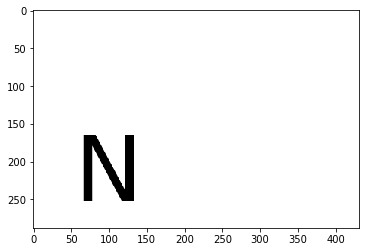

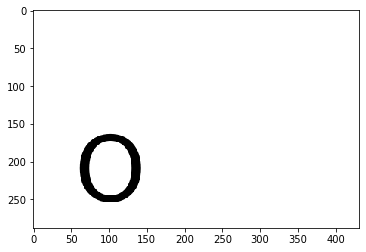

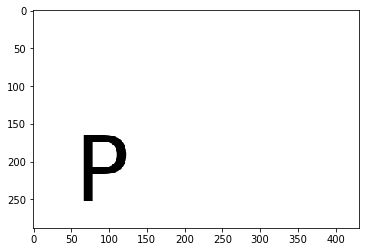

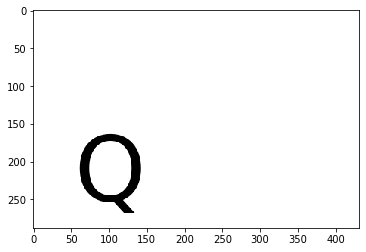

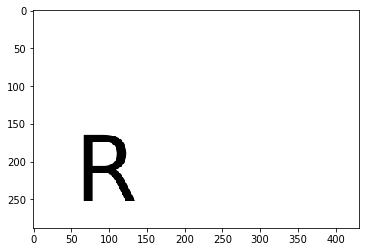

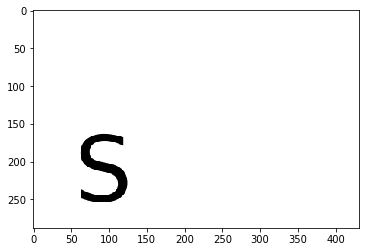

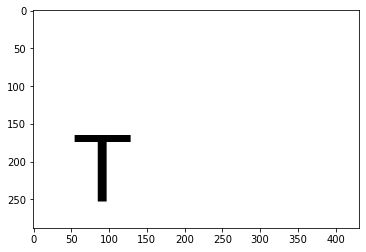

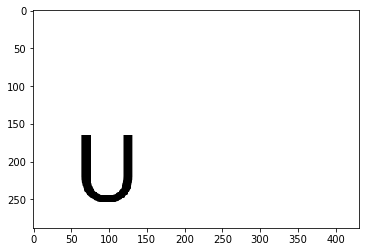

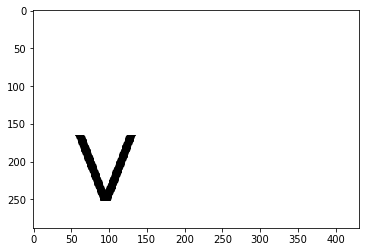

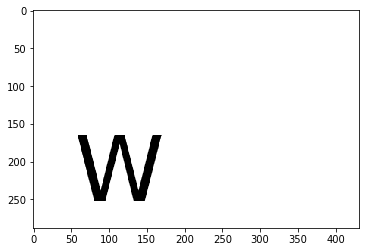

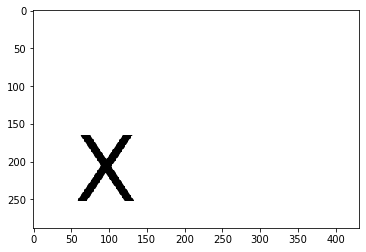

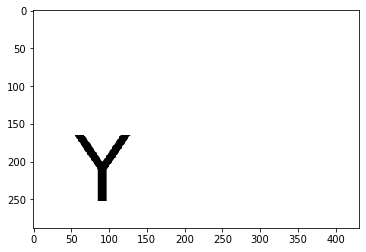

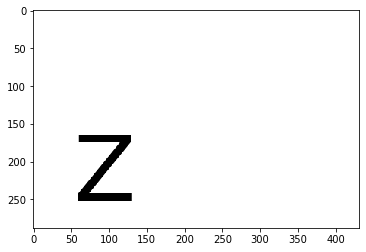

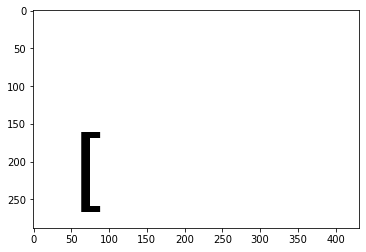

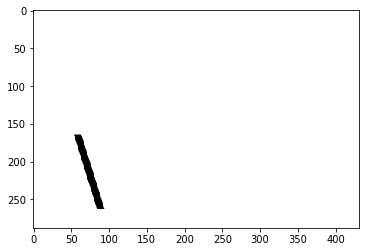

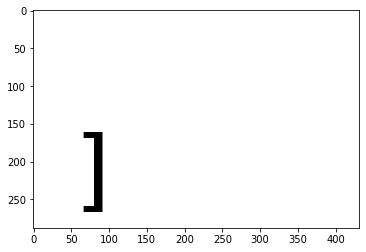

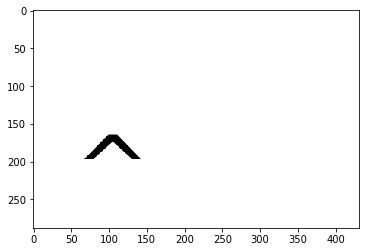

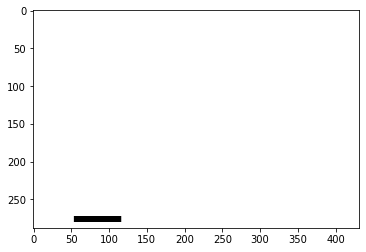

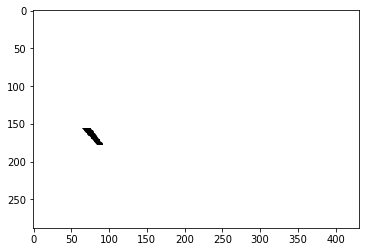

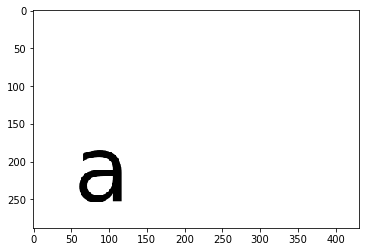

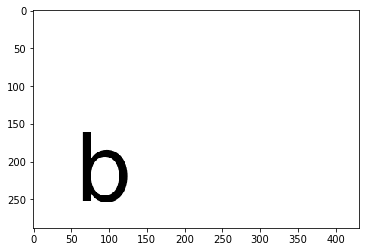

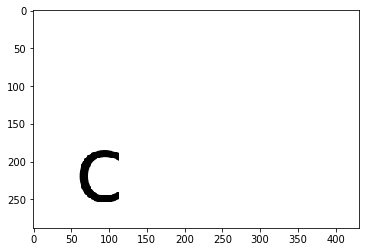

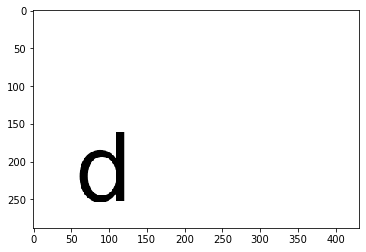

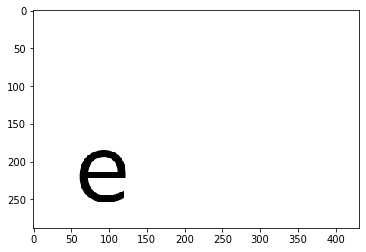

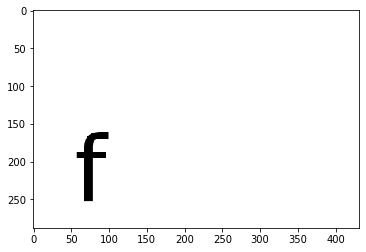

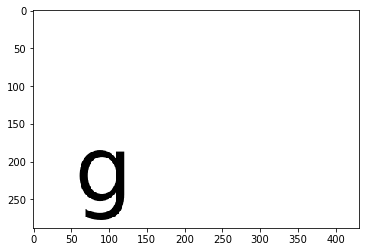

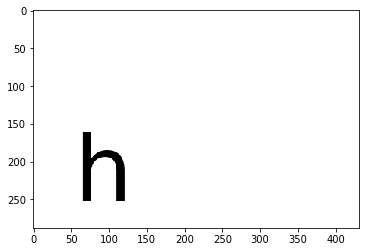

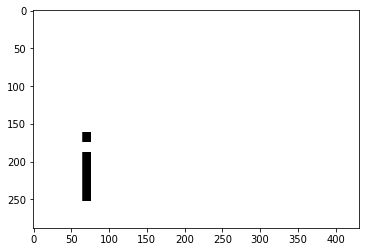

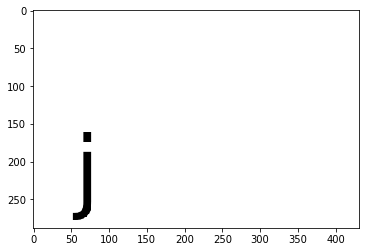

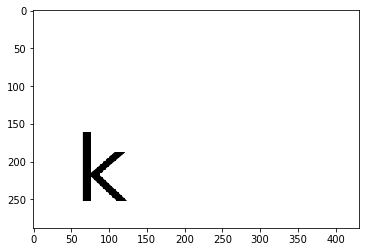

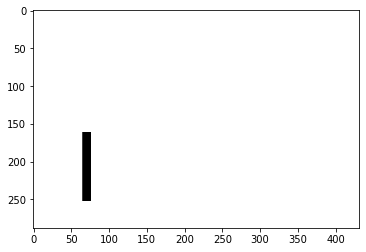

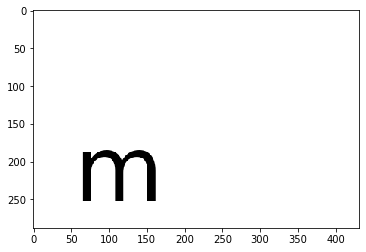

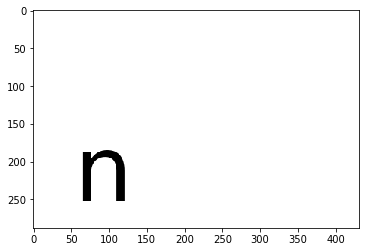

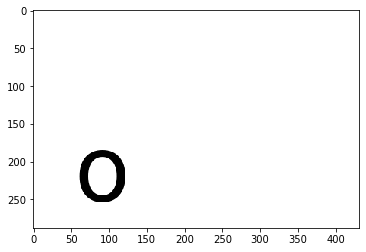

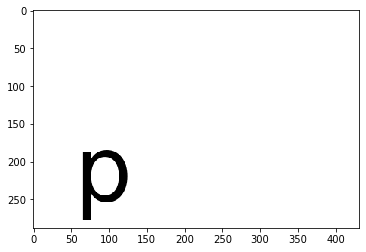

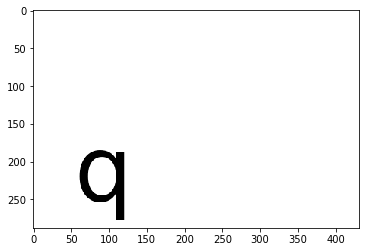

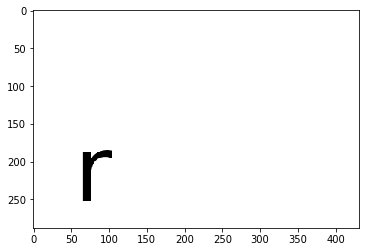

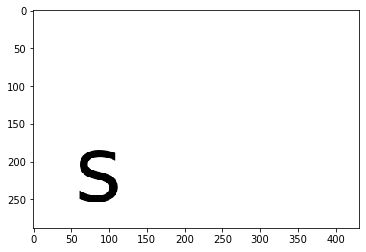

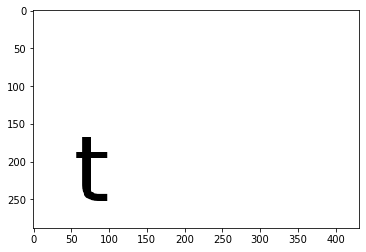

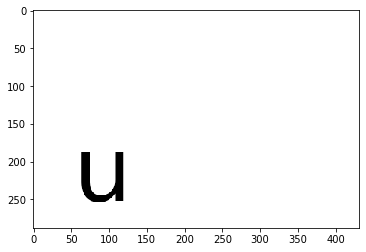

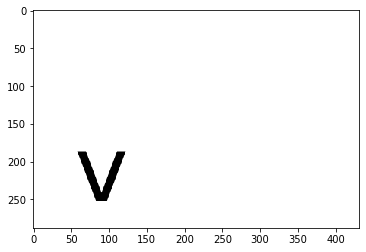

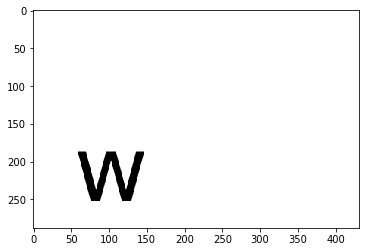

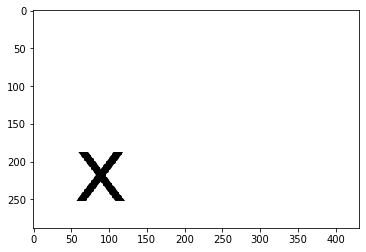

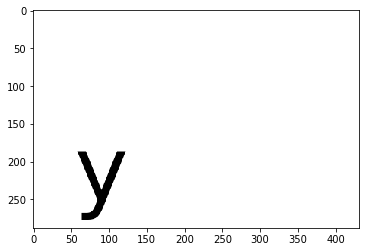

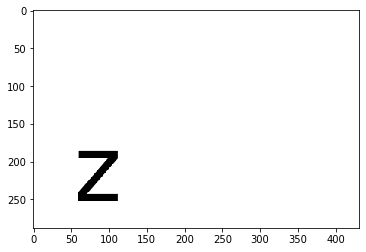

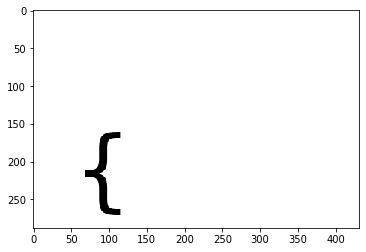

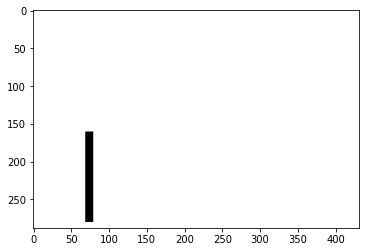

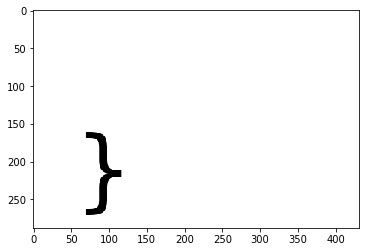

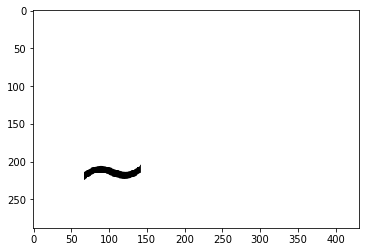

In [64]:
for i in images:
    plt.imshow(i)
    plt.show()

In [99]:
def countPixels(img):
    return np.sum(img<100)

In [100]:
mapping = {}
for i,v in enumerate(images):
    mapping[i+ascii_range[0]]=countPixels(v)
    

In [116]:
import os
import pickle
s = sorted(mapping.items(), key=lambda kv: kv[1])
print(s)
final_mapping = {}
cnt=1;
for (i,j) in s:
    final_mapping[i]=cnt/(len(s))
    cnt+=1
final_mapping[0]=1/2.0

with open('..\\embedding_weights\\intensity_weights.pickle', 'wb') as f:
    pickle.dump(final_mapping, f, pickle.HIGHEST_PROTOCOL)

[(32, 0), (46, 210), (96, 261), (45, 330), (44, 342), (39, 352), (58, 390), (95, 512), (59, 537), (34, 704), (126, 815), (105, 869), (33, 879), (94, 921), (108, 1001), (114, 1087), (47, 1107), (92, 1107), (73, 1131), (42, 1159), (40, 1266), (41, 1274), (124, 1320), (106, 1340), (116, 1371), (63, 1391), (91, 1406), (102, 1417), (43, 1475), (99, 1478), (93, 1496), (61, 1520), (76, 1561), (74, 1562), (118, 1610), (55, 1635), (125, 1644), (60, 1657), (62, 1665), (123, 1673), (49, 1691), (120, 1743), (115, 1747), (89, 1749), (122, 1749), (84, 1764), (117, 1818), (110, 1821), (70, 1874), (121, 1965), (111, 2048), (107, 2108), (50, 2113), (101, 2118), (104, 2133), (67, 2149), (97, 2154), (51, 2209), (53, 2229), (86, 2241), (52, 2276), (80, 2305), (88, 2347), (69, 2441), (83, 2447), (90, 2470), (36, 2481), (113, 2507), (112, 2517), (85, 2518), (100, 2524), (98, 2534), (65, 2537), (48, 2542), (75, 2628), (57, 2682), (72, 2682), (54, 2710), (119, 2785), (71, 2808), (103, 2808), (82, 2844), (56, 

In [274]:
ascii_text = ["___________                        _________                      __  .__    .__                ",
"\__    ___/__.__.______   ____    /   _____/ ____   _____   _____/  |_|  |__ |__| ____    ____  ",
"  |    | <   |  |\____ \_/ __ \   \_____  \ /  _ \ /     \_/ __ \   __\  |  \|  |/    \  / ___\ " ,
"  |    |  \___  ||  |_> >  ___/   /        (  <_9 )  Y Y  \  ___/|  | |   Y  \  |   |  \/ /_/  >" ,
"  |____|  / ____||   __/ \___  > /_______  /\____/|__|_|  /\___  >__| |___|  /__|___|  /\___  / ",
"          \/     |__|        \/          \/             \/     \/          \/        \//_____/  ",]

In [275]:
for line in ascii_text:
    print(line)

___________                        _________                      __  .__    .__                
\__    ___/__.__.______   ____    /   _____/ ____   _____   _____/  |_|  |__ |__| ____    ____  
  |    | <   |  |\____ \_/ __ \   \_____  \ /  _ \ /     \_/ __ \   __\  |  \|  |/    \  / ___\ 
  |    |  \___  ||  |_> >  ___/   /        (  <_9 )  Y Y  \  ___/|  | |   Y  \  |   |  \/ /_/  >
  |____|  / ____||   __/ \___  > /_______  /\____/|__|_|  /\___  >__| |___|  /__|___|  /\___  / 
          \/     |__|        \/          \/             \/     \/          \/        \//_____/  


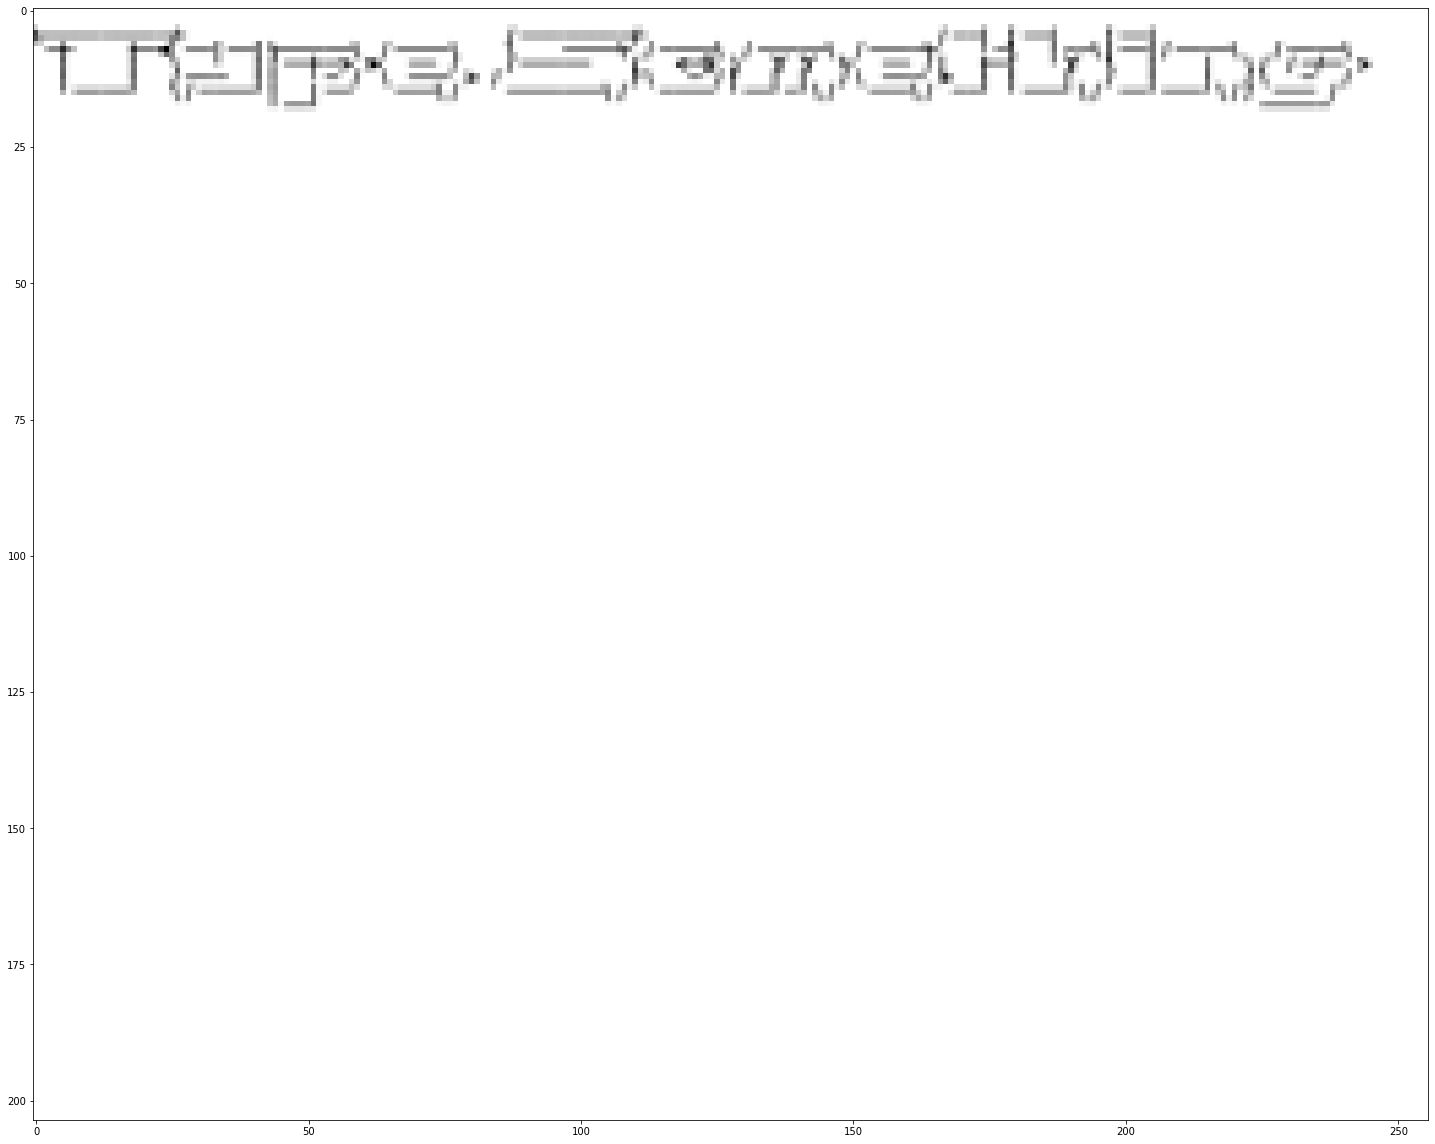

In [281]:
from PIL import Image,ImageDraw,ImageFont
from pylab import rcParams
rcParams['figure.figsize'] = 25, 25
width = 1024
height = 800
ascci_width = 100
ascii_height = 80
dx = width/ascci_width
dy = height/ascii_height
image = Image.new("RGBA", (width,height), (255,255,255))
draw = ImageDraw.Draw(image)
font = ImageFont.truetype("C:\\Windows\\Fonts\\arial.ttf", 18)
for i,line in enumerate(ascii_text):
    for j,ch in enumerate(line): 
        draw.text((j*dx, i*dy), ch, (0,0,0), font=font)
img_resized = image.resize((256,204), Image.BICUBIC)
gray = np.mean(img_resized,axis=2)


In [287]:
data_string = " a 23 3\n 2323b"
print([s for s in data_string.splitlines()])

[' a 23 3', ' 2323b']
